In [29]:
#Mohammad Alshurbaji
#Homework set 6
#Advanced Machine Learning
#Fall 2024
#Dr. Kai Lu
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy.io as sio #to read the matlab files
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [30]:
def load_dataset(matlabfile, variable_name):
    dataset = sio.loadmat(matlabfile)
    return dataset[variable_name]

In [31]:
def construct_affinity_matrix(data, sigma):
    Pdistance = squareform(pdist(data, 'euclidean'))
    # affinity_matrix = np.exp(-Pdistance**2 / (sigma)) #This is the given in the pdf but I think it's mistaken
    affinity_matrix = np.exp(-Pdistance**2 / (2 * sigma**2)) #This is the Gaussian Kernel which is more correct
    return affinity_matrix

def symmetrically_normalize(affinity_matrix):
    dmatrix = np.sum(affinity_matrix, axis = 1)
    symmetrical_normalize = affinity_matrix / np.sqrt(np.outer(dmatrix,dmatrix))
    return symmetrical_normalize
#Now: following the steps in the file to do the the spectral clustering
def spectral_clustering(data, k, sigma):
    #Constructing the affinity matrix
    affinity_matrix = construct_affinity_matrix(data, sigma)
    #Symmetrical Normalization
    normalized_affinity = symmetrically_normalize(affinity_matrix)
    #eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(normalized_affinity)
    top_k_eigenvectors = eigenvectors[:, -k:]
    #Normalize rows of eigenvectors
    norms = np.linalg.norm(top_k_eigenvectors, axis = 1, keepdims = True)
    normalized_eigenvectors = top_k_eigenvectors / norms
    #K-means
    kmeans = KMeans(n_clusters = k, random_state = 0)
    clusters = kmeans.fit_predict(normalized_eigenvectors)
    return clusters
#Plotting the clusters
def plot_clusters(data, clusters, title):
    plt.scatter(data[:,0], data[:,1], c = clusters, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
#Plotting the eigenvalues
def plot_eigenvalues(normalized_affinity, dataset):
    eigenvalues = np.linalg.eigvalsh(normalized_affinity)
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    plt.plot(range(1,11), sorted_eigenvalues[:10], '-o')
    plt.title(f'First 10 Eigenvalues: {dataset} and sigma = 0.05')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.show()


In [33]:
variable_mapping = {
    'concentric_updated.mat': 'X1',
    # 'rectangles.mat': 'X2',
    # 'links.mat': 'X3',
    # 'text.mat': 'X4'
}
sigmas = [0.025,0.05,0.2,0.5]
# datasets = ['concentric_updated.mat', 'links.mat', 'rectangles.mat', 'text.mat']
datasets = ['concentric_updated.mat']
k_values = [3,2,2,6]
for i, dataset in enumerate(datasets):
    variable_name = variable_mapping[dataset]
    data = load_dataset(dataset, variable_name)
    k = k_values[i]
    #First part of the problem: K-means only
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(data)
    plot_clusters(data, clusters, f'K-Means for {dataset}')
    #Spectral Clustering
    for sigma in sigmas:
        clusters = spectral_clustering(data, k, sigma)
        plot_clusters(data, clusters, f'Spectral Clustering for {dataset}, Sigma = {sigma}')

        if dataset in ['rectangles.mat', 'text.mat'] and sigma == 0.05:
            affinity_matrix = construct_affinity_matrix(data, 0.05)
            normalized_affinity = symmetrically_normalize(affinity_matrix)
            plot_eigenvalues(normalized_affinity, dataset)
            

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/concentric_updated.mat'

C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


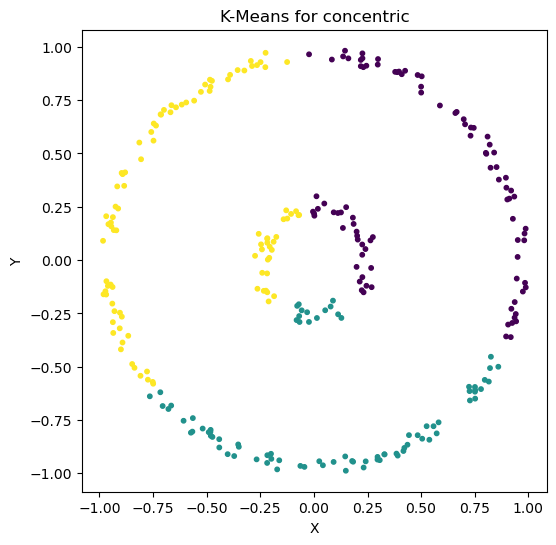

C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


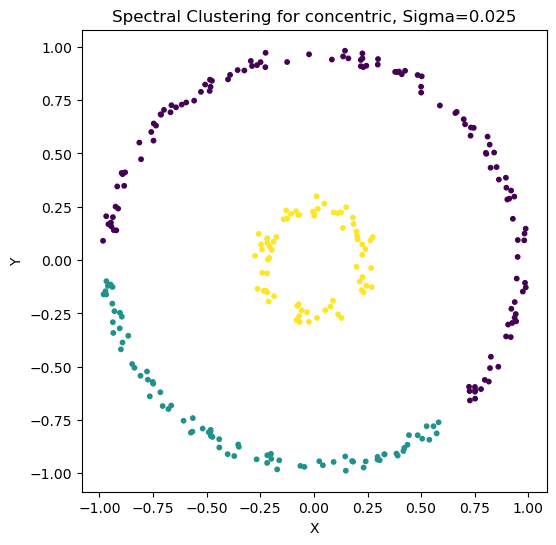

C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


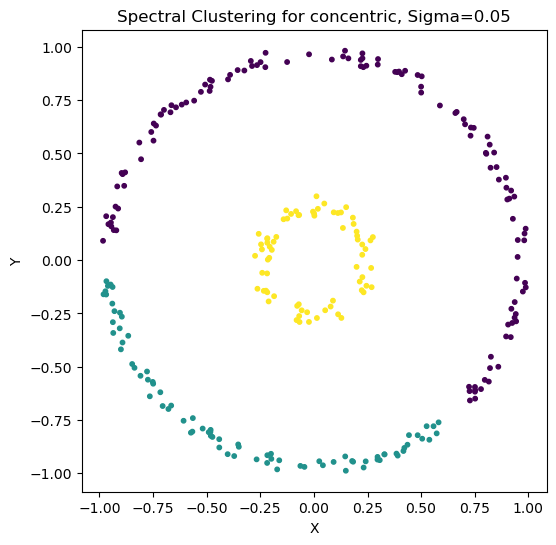

C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


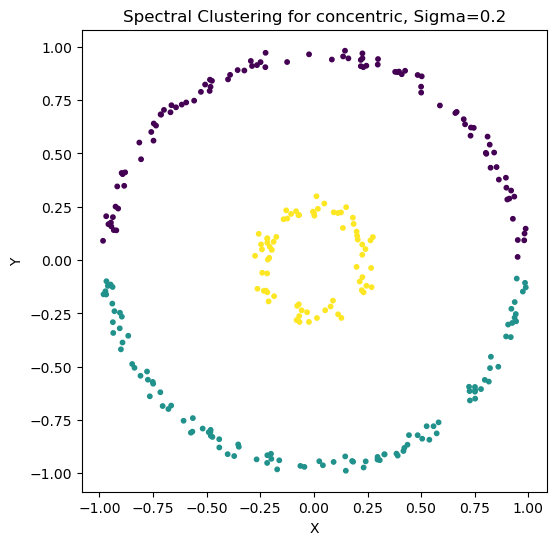

C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


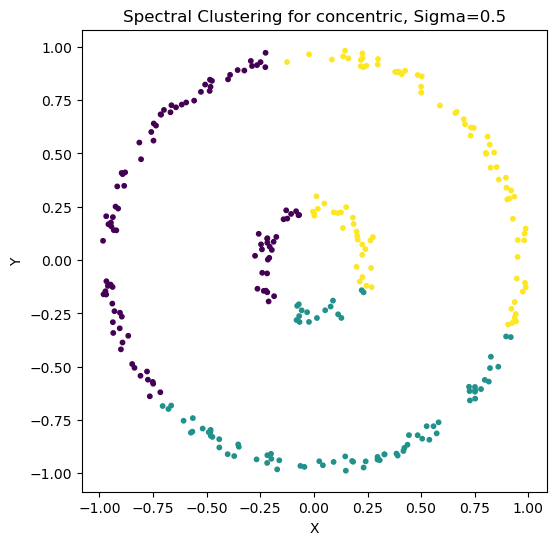

KeyError: 'X2'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from scipy.io import loadmat

# Construct affinity matrix
def construct_affinity_matrix(data, sigma):
    Pdistance = squareform(pdist(data, 'euclidean'))
    affinity_matrix = np.exp(-Pdistance**2 / (2 * sigma**2))
    return affinity_matrix

# Normalize affinity matrix
def symmetrically_normalize(affinity_matrix):
    dmatrix = np.sum(affinity_matrix, axis=1)
    symmetrical_normalize = affinity_matrix / np.sqrt(np.outer(dmatrix, dmatrix))
    return symmetrical_normalize

# Perform spectral clustering
def spectral_clustering(data, k, sigma):
    affinity_matrix = construct_affinity_matrix(data, sigma)
    normalized_affinity = symmetrically_normalize(affinity_matrix)
    eigenvalues, eigenvectors = np.linalg.eigh(normalized_affinity)
    top_k_eigenvectors = eigenvectors[:, -k:]
    norms = np.linalg.norm(top_k_eigenvectors, axis=1, keepdims=True)
    normalized_eigenvectors = top_k_eigenvectors / norms
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    clusters = kmeans.fit_predict(normalized_eigenvectors)
    return clusters, eigenvalues, normalized_eigenvectors

# Plotting functions
def plot_clusters(data, clusters, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def plot_eigenvalues(eigenvalues, dataset):
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 16), sorted_eigenvalues[:15], '-o')
    plt.title(f'First 15 Eigenvalues: {dataset}')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.show()

# Load datasets and apply spectral clustering
datasets = {
    'concentric': 'X1',
    'links': 'X2',
    'rectangles': 'X3',
    'text': 'X4'
}

sigmas = [0.025, 0.05, 0.2, 0.5]
k_values = [3, 2, 2, 6]

# Load and process datasets
for i, (dataset, variable) in enumerate(datasets.items()):
    data_file = f'{dataset}.mat'  # Correct the path as needed
    data = loadmat(data_file)[variable]
    k = k_values[i]

    # Apply K-means only
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    clusters_kmeans = kmeans.fit_predict(data)
    plot_clusters(data, clusters_kmeans, f'K-Means for {dataset}')

    # Apply Spectral Clustering
    for sigma in sigmas:
        clusters, eigenvalues, normalized_eigenvectors = spectral_clustering(data, k, sigma)
        plot_clusters(data, clusters, f'Spectral Clustering for {dataset}, Sigma={sigma}')

        # Plot eigenvalues if relevant
        if dataset in ['rectangles', 'text'] and sigma == 0.05:
            plot_eigenvalues(eigenvalues, dataset)


In [24]:
def construct_affinity_matrix(data, sigma):
    Pdistance = squareform(pdist(data, 'euclidean'))
    # affinity_matrix = np.exp(-Pdistance**2 / (sigma)) #This is the given in the pdf but I think it's mistaken
    affinity_matrix = np.exp(-Pdistance**2 / (2 * sigma**2)) #This is the Gaussian Kernel which is more correct
    return affinity_matrix

def symmetrically_normalize(affinity_matrix):
    dmatrix = np.sum(affinity_matrix, axis = 1)
    symmetrical_normalize = affinity_matrix / np.sqrt(np.outer(dmatrix,dmatrix))
    return symmetrical_normalize
#Now: following the steps in the file to do the the spectral clustering
def spectral_clustering(data, k, sigma):
    #Constructing the affinity matrix
    affinity_matrix = construct_affinity_matrix(data, sigma)
    #Symmetrical Normalization
    normalized_affinity = symmetrically_normalize(affinity_matrix)
    #eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(normalized_affinity)
    top_k_eigenvectors = eigenvectors[:, -k:]
    #Normalize rows of eigenvectors
    norms = np.linalg.norm(top_k_eigenvectors, axis = 1, keepdims = True)
    normalized_eigenvectors = top_k_eigenvectors / norms
    #K-means
    kmeans = KMeans(n_clusters = k, random_state = 0)
    clusters = kmeans.fit_predict(normalized_eigenvectors)
    return clusters
#Plotting the clusters
def plot_clusters(data, clusters, title):
    plt.scatter(data[:,0], data[:,1], c = clusters, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
#Plotting the eigenvalues
def plot_eigenvalues(normalized_affinity, dataset):
    eigenvalues = np.linalg.eigvalsh(normalized_affinity)
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    plt.plot(range(1,11), sorted_eigenvalues[:10], '-o')
    plt.title(f'First 10 Eigenvalues: {dataset} and sigma = 0.05')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.show()


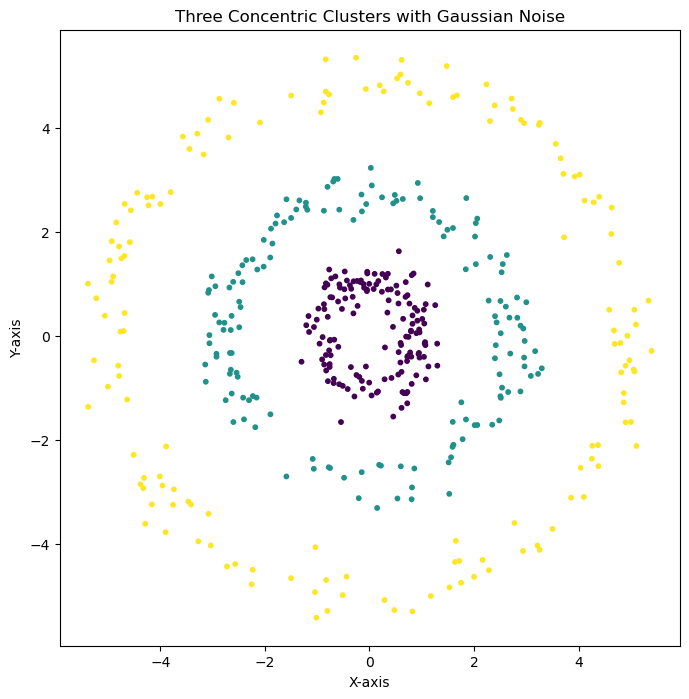

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_points_per_cluster = 150
std_dev = 0.25  # Noise level

# Radii of the clusters
radii = [1, 2.8, 5]

# Generate data
data = []
labels = []

for idx, radius in enumerate(radii):
    angles = np.random.uniform(0, 2 * np.pi, n_points_per_cluster)
    x = radius * np.cos(angles) + np.random.normal(0, std_dev, n_points_per_cluster)
    y = radius * np.sin(angles) + np.random.normal(0, std_dev, n_points_per_cluster)
    data.append(np.column_stack((x, y)))
    labels.extend([idx] * n_points_per_cluster)

# Combine all clusters into one dataset
data = np.vstack(data)
labels = np.array(labels)

# Plot the data
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10)
plt.title('Three Concentric Clusters with Gaussian Noise')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.show()


In [26]:
# # variable_mapping = {
# #     'concentric.mat': 'X1',
# # }
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import pdist, squareform

# sigmas = [0.025,0.05,0.2,0.5]

# # datasets = ['concentric.mat']
# k_values = [3,2,10,6]
# # for i, dataset in enumerate(dataset):
# #     # variable_name = variable_mapping[dataset]
# #     # data = load_dataset(dataset, variable_name)
# #     k = 3
#     #First part of the problem: K-means only
#     # kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
#     # clusters = kmeans.fit_predict(data)
#     # plot_clusters(data, clusters, f'K-Means for {dataset}')
#     #Spectral Clustering
# for i, sigma in enumerate(sigmas):
#     k = k_values[i]
#     clusters = spectral_clustering(data, k, sigma)
#     # plot_clusters(data, clusters, f'Spectral Clustering for {data}, Sigma = {sigma}')
#     plot_clusters(data, clusters, f'Spectral Clustering for concentric.mat, Sigma = {sigma}')


#     # if dataset in ['rectangles.mat', 'text.mat'] and sigma == 0.05:
#     #     affinity_matrix = construct_affinity_matrix(data, 0.05)
#     #     normalized_affinity = symmetrically_normalize(affinity_matrix)
#     #     plot_eigenvalues(normalized_affinity, dataset)
# Sigmas and k-values to explore
sigmas = [0.025, 0.05, 0.2, 0.5]
k_values = [3, 2, 10, 6]

# Perform Spectral Clustering
for i, sigma in enumerate(sigmas):
    k = k_values[i]
    clusters = spectral_clustering(data, k, sigma)
    plot_clusters(data, clusters, f'Spectral Clustering (k={k}, σ={sigma})')

    # Optional: Plot eigenvalues only once for clarity
    if sigma == 0.05:
        affinity_matrix = construct_affinity_matrix(data, sigma)
        normalized_affinity = symmetrically_normalize(affinity_matrix)
        plot_eigenvalues(normalized_affinity, f'Dataset with σ={sigma}')
        

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_24020\117848233.py:22: RuntimeWarning: invalid value encountered in divide
  normalized_eigenvectors = top_k_eigenvectors / norms


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values